In [64]:
import tensorflow
import numpy as np

In [65]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [66]:
len(test_data)

2246

In [67]:
def vectorize_sequence(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results


In [68]:
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [69]:
def to_one_hot(labels,dimensions=46):
    results=np.zeros((len(labels),dimensions))
    for i,label in enumerate(labels):
        results[i,label]=1
    return results

### another way to do it by using to_categorical

In [70]:
from keras.utils.np_utils import to_categorical

In [71]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [72]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [73]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [74]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [76]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 224us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 226us/step - loss: 0.7033 - acc: 0.8472 - val_loss: 0.9843 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.5665 - acc: 0.8799 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.4582 - acc: 0.9047 - val_loss: 0.9092 - val_acc: 0.8010


## Plotting the training and validation loss

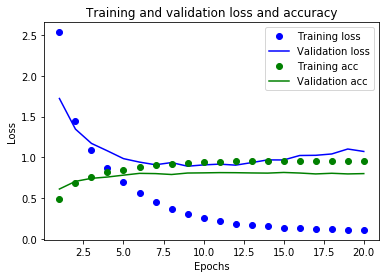

In [79]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the training and validation accuracy

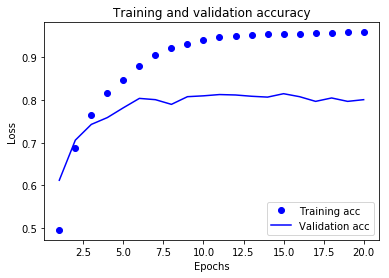

In [80]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [82]:
model=models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 211us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 184us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 186us/step - loss: 1.0136 - acc: 0.7783 - val_loss: 1.1305 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 209us/step - loss: 0.7975 - acc: 0.8254 - val_loss: 1.0536 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 190us/step - loss: 0.6392 - acc: 0.8624 - val_loss: 0.9752 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 182us/step - loss: 0.5112 - acc: 0.8930 - val_loss: 0.9089 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.4107 - acc: 0.9147 - val_loss: 0.8909 - val_acc: 0.8210
Epoch 8

In [84]:
results

[1.0254168068842493, 0.7756010686194165]

In [85]:
import copy

test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

In [86]:
predictions=model.predict(x_test)
predictions[0].shape

(46,)

In [87]:
np.sum(predictions[0])

0.9999997

In [89]:
np.argmax(predictions[0])

3

## Another Way

In [90]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [91]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [93]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 309us/step - loss: 2.4715 - acc: 0.4977 - val_loss: 1.8522 - val_acc: 0.5960
Epoch 2/20
7982/7982 [==============================] - 2s 275us/step - loss: 1.6666 - acc: 0.6164 - val_loss: 1.6013 - val_acc: 0.6260
Epoch 3/20
7982/7982 [==============================] - 2s 290us/step - loss: 1.4294 - acc: 0.6559 - val_loss: 1.4859 - val_acc: 0.6510
Epoch 4/20
7982/7982 [==============================] - 2s 273us/step - loss: 1.2651 - acc: 0.6820 - val_loss: 1.4035 - val_acc: 0.6760
Epoch 5/20
7982/7982 [==============================] - 2s 276us/step - loss: 1.1226 - acc: 0.7126 - val_loss: 1.3676 - val_acc: 0.6760
Epoch 6/20
7982/7982 [==============================] - 2s 279us/step - loss: 1.0054 - acc: 0.7264 - val_loss: 1.2996 - val_acc: 0.6860
Epoch 7/20
7982/7982 [==============================] - 2s 282us/step - loss: 0.9083 - acc: 0.7339 - val_loss: 1.2978 - val_acc: 0.6940


In [95]:
a=[1,2,3,4,5]
a[-1]

5

In [98]:
hjk=[]

if hjk:
    hjk.append("kakaj")


In [99]:
hjk

[]